In [1]:
from data_tools import *

In [2]:
img_dir = '/home/jovyan/data/planet_flat'

In [4]:
tif_fns=fn_list(img_dir, "*.tif")

/home/jovyan/data/planet_flat/794622_1060718_2017-09-28_101f_BGRN_DN_udm.tif
/home/jovyan/data/planet_flat/2631559_1060719_2019-08-27_1032_BGRN_DN_udm.tif
/home/jovyan/data/planet_flat/2412899_1060718_2019-06-02_0f15_BGRN_DN_udm.tif
/home/jovyan/data/planet_flat/644798_1060618_2017-07-25_103d_BGRN_Analytic.tif
/home/jovyan/data/planet_flat/2575093_1060618_2019-08-04_1039_BGRN_DN_udm.tif
/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_DN_udm.tif
/home/jovyan/data/planet_flat/2575093_1060719_2019-08-04_1039_BGRN_Analytic.tif
/home/jovyan/data/planet_flat/2548533_1060719_2019-07-25_0f15_BGRN_Analytic.tif
/home/jovyan/data/planet_flat/2574618_1060618_2019-08-04_0f3d_BGRN_Analytic.tif
/home/jovyan/data/planet_flat/794419_1060718_2017-09-28_1003_BGRN_DN_udm.tif
/home/jovyan/data/planet_flat/794418_1060618_2017-09-28_0f35_BGRN_DN_udm.tif
/home/jovyan/data/planet_flat/2632389_1060618_2019-08-27_1058_BGRN_DN_udm.tif
/home/jovyan/data/planet_flat/703947_1060718_2017-08-22_1035_

In [5]:
tif_fns[0]

'/home/jovyan/data/planet_flat/2412593_1060618_2019-06-02_0f4d_BGRN_Analytic.tif'

In [33]:
# first, first_ndv=read_raster(tif_fns[0], band=)
first, first_ndv=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=None)



In [34]:
first.shape

(4, 8000, 8000)

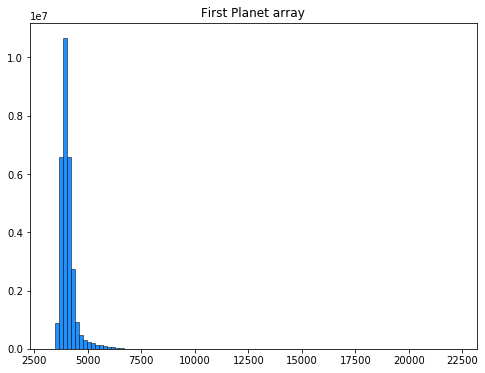

In [14]:
histo_me(arr=np.ma.masked_equal(first, 0), 
         title="First Planet array",
        )

In [17]:
tell_me_more(arr=np.ma.masked_equal(first, 0), 
             name_of_someData='First Planet Array')

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


[0.0, 0.0, 0.0, 4164.0, 5288.0, 6635.0, 410.3756081707221]

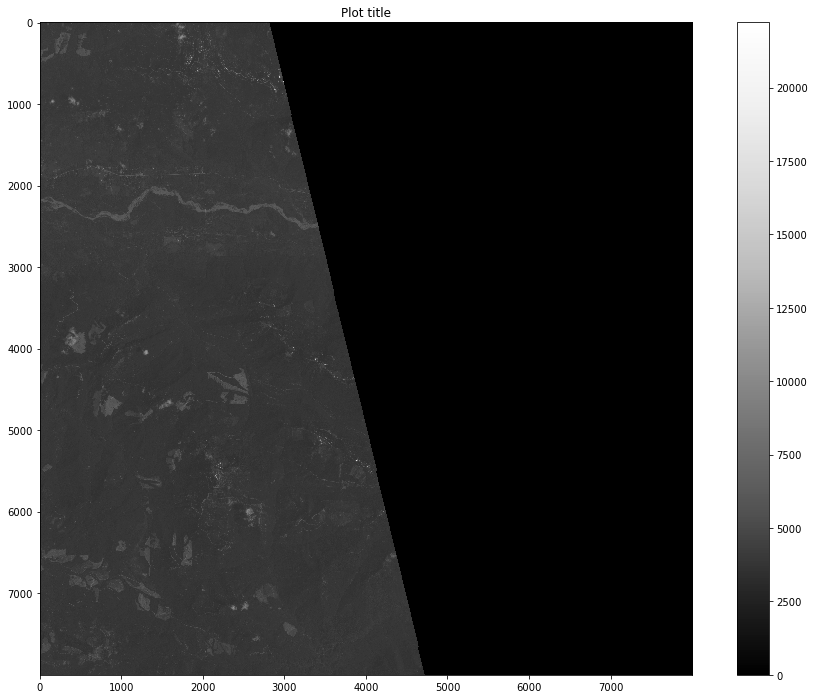

In [19]:
plot_me(first)

In [25]:
from xml.dom import minidom

xmldoc = minidom.parse("/home/jovyan/data/planet_flat/2412593_1060618_2019-06-02_0f4d_BGRN_Analytic_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)

print("Conversion coefficients:", coeffs)

Conversion coefficients: {1: 2.18575055647e-05, 2: 2.31374581519e-05, 3: 2.57859503856e-05, 4: 3.92127558352e-05}


In [35]:
band_blue_radiance, _=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=1)
band_green_radiance, _=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=2)
band_red_radiance, _=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=3)
band_nir_radiance, _=read_raster('/home/jovyan/data/planet_flat/795543_1060719_2017-09-28_1021_BGRN_Analytic.tif', band=4)

In [36]:
# Multiply the Digital Number (DN) values in each band by the TOA reflectance coefficients
band_blue_reflectance = band_blue_radiance * coeffs[1]
band_green_reflectance = band_green_radiance * coeffs[2]
band_red_reflectance = band_red_radiance * coeffs[3]
band_nir_reflectance = band_nir_radiance * coeffs[4]

import numpy as np
print("Red band radiance is from {} to {}".format(np.amin(band_red_radiance), np.amax(band_red_radiance)))
print("Red band reflectance is from {} to {}".format(np.amin(band_red_reflectance), np.amax(band_red_reflectance)))

Red band radiance is from 0 to 25348
Red band reflectance is from 0.0 to 0.6536222703741887


In [37]:
print("Blue band radiance is from {} to {}".format(np.amin(band_blue_radiance), np.amax(band_blue_radiance)))
print("Blue band reflectance is from {} to {}".format(np.amin(band_blue_reflectance), np.amax(band_blue_reflectance)))

Blue band radiance is from 0 to 29990
Blue band reflectance is from 0.0 to 0.655506591885353


In [38]:
print("Blue band radiance is from {} to {}".format(np.amin(band_blue_radiance), np.amax(band_blue_radiance)))
print("Blue band reflectance is from {} to {}".format(np.amin(band_blue_reflectance), np.amax(band_blue_reflectance)))

Blue band radiance is from 0 to 29990
Blue band reflectance is from 0.0 to 0.655506591885353


In [39]:
refl_array=np.dstack((band_blue_reflectance, 
                     band_green_reflectance, 
                     band_red_reflectance, 
                     band_nir_reflectance))

In [40]:
# Calculate reflectances. please.
np.save('795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy',refl_array)

In [ ]:
arr_list=[read_raster(fn)[0] for fn in tif_fns]

In [44]:
x=np.load('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy')
x.shape

(8000, 8000, 4)

In [45]:
refl_array_ogconfig=np.stack((band_blue_reflectance, 
                     band_green_reflectance, 
                     band_red_reflectance, 
                     band_nir_reflectance))

In [46]:
refl_array_ogconfig.shape

(4, 8000, 8000)

In [48]:
# Calculate reflectances. please.
np.save('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy', refl_array_ogconfig)

In [44]:
# x=np.load('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy')
# x.shape

(8000, 8000, 4)

In [49]:
x=np.load('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy')
x.shape

(4, 8000, 8000)

In [51]:
blue=x[0,:,:]
green=x[1,:,:]
red=x[2,:,:]
nir=x[3,:,:]

In [52]:
blue.shape

(8000, 8000)

In [ ]:
img=np.load('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy')
img.shape

blue=img[:,:,0]
green=img[:,:,0]
red=img[:,:,0]
nir=img[:,:,0]